## **1. Import the necessary libraries**
---

In [1]:
import datetime
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.8.3
numpy:       1.21.5
matplotlib:  3.5.1
sklearn:     1.0.2


## **2.Create a function to plot image without axis**
---

In [2]:
def implt(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

print(implt)

x = datetime.datetime.now()
filename = x.strftime("%Y") + x.strftime("%m") + x.strftime("%d") + x.strftime("%H") + x.strftime("%M")

<function implt at 0x000001534C1878B0>


## **3. Set matplotlib to have seaborn plot style**
---

In [3]:
plt.style.use('seaborn')                   # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


# **4.1 Downsize original images (Optional)**

In [4]:
image_size = 64

def resize_image(source_data_dir):
    data = []
    
    os.chdir(source_data_dir)
    
    for label in labels:
        path = source_data_dir
        # print(path)
        for image in os.listdir(path):
            if "downsized_" not in image:
                try:
                    # Convert BGR to RGB
                    image_array = cv2.imread(os.path.join(path, image))
                    # Resize image
                    resized_array = cv2.resize(image_array, (image_size, image_size))
                    cv2.imwrite("downsized_" + image, resized_array)
                except Exception as e:
                    print(e)

In [5]:
# resize_image('C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\Cleaned\\GoldfishBGReduc-Downsized')
# 'C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReducedabc_2\\Test\\Fish')

In [6]:
print(os.getcwd())

C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode


# **4.2 Prepare Fish Or Not Fish data for training and testing**

In [7]:
labels = [
    'Fish',
    'NotFish'
]

# labels = [
# '004_aquatic_fish_aquarium_fish',
# '005_aquatic_fish_flatfish',
# '006_aquatic_fish_ray',
# '007_aquatic_fish_shark',
# '008_aquatic_fish_trout',
# '009_aquatic_mammals_beaver',
# '010_aquatic_mammals_dolphin',
# '011_aquatic_mammals_otter',
# '012_aquatic_mammals_seal',
# '013_aquatic_mammals_whale',
# '014_flowers_orchid',
# '015_flowers_poppy',
# '016_flowers_rose',
# '017_flowers_sunflower',
# '018_flowers_tulip',
# '019_food_containers_bottle',
# '020_food_containers_bowl',
# '021_food_containers_can',
# '022_food_containers_cup',
# '023_food_containers_plate',
# '024_fruit_and_vegetables_apple',
# '025_fruit_and_vegetables_mushroom',
# '026_fruit_and_vegetables_orange',
# '027_fruit_and_vegetables_pear',
# '028_fruit_and_vegetables_sweet_pepper',
# '029_household_electrical_devices_clock',
# '030_household_electrical_devices_keyboard',
# '031_household_electrical_devices_lamp',
# '032_household_electrical_devices_telephone',
# '033_household_electrical_devices_television',
# '034_household_furniture_bed',
# '035_household_furniture_chair',
# '036_household_furniture_couch',
# '037_household_furniture_table',
# '038_household_furniture_wardrobe',
# '039_insects_bee',
# '040_insects_beetle',
# '041_insects_butterfly',
# '042_insects_caterpillar',
# '043_insects_cockroach',
# '044_large_carnivores_bear',
# '045_large_carnivores_leopard',
# '046_large_carnivores_lion',
# '047_large_carnivores_tiger',
# '048_large_carnivores_wolf',
# '049_large_man_made_outdoor_things_bridge',
# '050_large_man_made_outdoor_things_castle',
# '051_large_man_made_outdoor_things_house',
# '052_large_man_made_outdoor_things_road',
# '053_large_man_made_outdoor_things_skyscraper',
# '054_large_natural_outdoor_scenes_cloud',
# '055_large_natural_outdoor_scenes_forest',
# '056_large_natural_outdoor_scenes_mountain',
# '057_large_natural_outdoor_scenes_plain',
# '058_large_natural_outdoor_scenes_sea',
# '059_large_omnivores_and_herbivores_camel',
# '060_large_omnivores_and_herbivores_cattle',
# '061_large_omnivores_and_herbivores_chimpanzee',
# '062_large_omnivores_and_herbivores_elephant',
# '063_large_omnivores_and_herbivores_kangaroo',
# '064_medium_mammals_fox',
# '065_medium_mammals_porcupine',
# '066_medium_mammals_possum',
# '067_medium_mammals_raccoon',
# '068_medium_mammals_skunk',
# '069_non_insect_invertebrates_crab',
# '070_non_insect_invertebrates_lobster',
# '071_non_insect_invertebrates_snail',
# '072_non_insect_invertebrates_spider',
# '073_non_insect_invertebrates_worm',
# '074_people_baby',
# '075_people_boy',
# '076_people_girl',
# '077_people_man',
# '078_people_woman',
# '079_reptiles_crocodile',
# '080_reptiles_dinosaur',
# '081_reptiles_lizard',
# '082_reptiles_snake',
# '083_reptiles_turtle',
# '084_small_mammals_hamster',
# '085_small_mammals_mouse',
# '086_small_mammals_rabbit',
# '087_small_mammals_shrew',
# '088_small_mammals_squirrel',
# '089_trees_maple_tree',
# '090_trees_oak_tree',
# '091_trees_palm_tree',
# '092_trees_pine_tree',
# '093_trees_willow_tree',
# '094_vehicles_1_bicycle',
# '095_vehicles_1_bus',
# '096_vehicles_1_motorcycle',
# '097_vehicles_1_pickup_truck',
# '098_vehicles_1_train',
# '099_vehicles_2_lawn_mower',
# '100_vehicles_2_rocket',
# '101_vehicles_2_streetcar',
# '102_vehicles_2_tank',
# '103_vehicles_2_tractor'    
# ]

In [8]:
image_size = 64

def get_data(data_dir):
    data = []
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_number = labels.index(label)
        
        for image in os.listdir(path):
            try:
                # Convert BGR to RGB
                image_array = cv2.imread(os.path.join(path, image))[...,::-1]
                # Resize image
                resized_array = cv2.resize(image_array, (image_size, image_size))
                resized_array = resized_array / 255.0
                
#                 image = tf.keras.utils.load_img(os.path.join(path, image), target_size = None, keep_aspect_ratio = True)

#                 resized_array = tf.keras.utils.img_to_array(image)
#                 resized_array = tf.keras.preprocessing.image.smart_resize(resized_array, size = (image_size, image_size))
#                 # resized_array = tf.expand_dims(image_array, 0)
#                 resized_array = resized_array / 255.0
                
                data.append([resized_array, class_number])
                
            
            except Exception as e:
                print(e)
                
    return np.array(data)
    
# Fetch Train and Test Data
train = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReduced_3_3_CifarMixed\\Train")
val = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReduced_3_3_CifarMixed\\Test")

C:\Users\jerem\AppData\Local\Temp\ipykernel_36820\1788170417.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [9]:
print(train.shape)

(9500, 2)


In [10]:
l = []

for i in train:
    l.append(labels[i[1]])

9500


C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

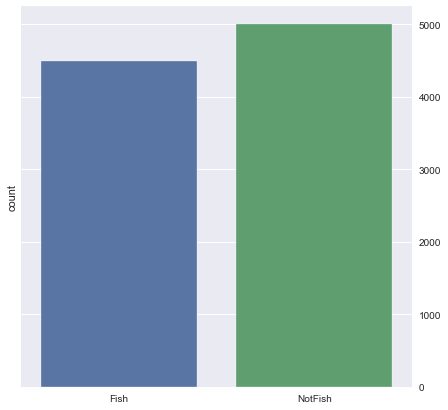

In [11]:
print(len(l))

sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Fish')

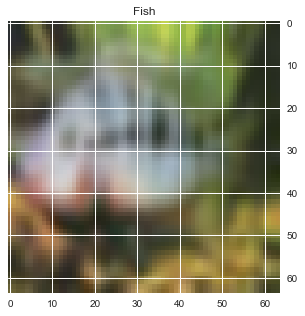

In [12]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'NotFish')

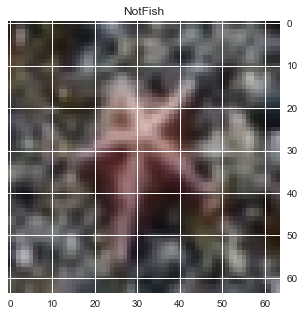

In [13]:
plt.figure(figsize = (5, 5))
plt.imshow(train[8000][0])
plt.title(labels[train[8000][1]])

## **5. Perform Pre-Processing and Augmentation**

In [14]:
x_train = []
y_train = []

x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [15]:
# Convert to Numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
# Keras provides numpy utility library, which provides functions to perform actions on numpy arrays.
# Using the method to_categorical(), a numpy array (or) a vector which has integers that represent
# different categories, can be converted into a numpy array (or) a matrix which has binary values and
# has columns equal to the number of categories in the data. (One Hot Encoding)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [16]:
print(x_train.shape)
print(x_val.shape)


(9500, 64, 64, 3)
(1900, 64, 64, 3)


In [17]:
print(y_train.shape)
print(y_val.shape)

(9500, 2)
(1900, 2)


In [18]:
# datagen = ImageDataGenerator(
#         featurewise_center = False,  # set input mean to 0 over the dataset
#         samplewise_center = False,  # set each sample mean to 0
#         featurewise_std_normalization = False,  # divide inputs by std of the dataset
#         samplewise_std_normalization = False,  # divide each input by its std
#         zca_whitening = False,  # apply ZCA whitening
#         rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
#         shear_range = 0.1,
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip = False)  # randomly flip images

# datagen.fit(x_train)

image_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_size,
                                   image_size,
                                   3))
    # layers.RandomRotation(0.1)
    # layers.RandomZoom(0.2, (0.2, 0.3))
  ]
)

# image_augmentation = Sequential(
#   [
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2,)
#   ]
# )

## **6. Define the Model**

In [19]:
seed = 29
np.random.seed(seed)

optmz       = optimizers.RMSprop(learning_rate=0.0001)                                     # Step 1
modelname   = 'Hybrid_Cifar100'                                                          # Step 2

image_height = image_size  
image_width = image_size
channel = 3
                                                                                # Step 3
def createModel():
    model = Sequential()

    model.add(image_augmentation)

    model.add(Conv2D(64, (3, 3), padding = 'same',  input_shape=(image_height, image_width, channel), kernel_initializer = 'he_normal', kernel_regularizer = l2(0.0013), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.0013), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.2))
    
    model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.0013), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.2))
    
    # model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.0001), activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.0001), activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    # model.add(Dense(2048, activation = 'relu'))
    # model.add(Dense(1028, activation = 'relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(512, activation = 'relu'))
    # model.add(Dropout(0.25))
    # model.add(Dense(256, activation = 'relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(len(labels), activation = 'softmax'))  
    
#     model.add(Conv2D(64, (3, 3), padding = 'same',  input_shape=(image_height, image_width, channel), kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))

#     model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(16, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
    
    
#     model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', input_shape=(image_height, image_width, channel), kernel_initializer = 'he_normal', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))

#     model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))

#     model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.1))
    
        
#     model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(image_height, image_width, channel), kernel_initializer='he_normal', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer = l2(0.001), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))

    # model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(1028, activation = 'relu'))
#     model.add(Dropout(0.5))
# #     model.add(Dense(256, activation = 'relu'))
# #     model.add(Dropout(0.2))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(len(labels), activation = 'softmax'))

    # model.compile(loss = 'binary_crossentropy', optimizer = optmz, metrics = ['accuracy'])
    model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])
    # model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = optmz, metrics = ['accuracy'])

    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
modelGo     = createModel()   # This is used for final testing

model.summary()                                                                 # Step 5

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)      



## **7. Create the callbacks to be applied during training**
---
* Step 1: Create a callback to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a callback to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two callbacks objects into a list

In [20]:
folderpath      = "C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\models\\"# '/content/gdrive/My Drive/iss/prumls/colab/'
filepath        = folderpath + modelname + "_" + filename + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath + modelname + "_" + filename + ".csv")                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath + modelname + "_" + filename + ".csv")

Callbacks created:

Path to model: C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210142350.hdf5
Path to log:   C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210142350.csv


## **8. Train the deep learning model**
___

In [21]:
history = model.fit(x_train,                            # Training data
          y_train,                            # Training label
          validation_data = (x_val, y_val),   # Validation data and label
          epochs = 50,                       # The amount of epochs to be trained
          batch_size = 32,                   
          shuffle = True,                     # To shuffle the training data
          callbacks = callbacks_list)         # Callbacks to execute the checkpoints

# history = model.fit(datagen.flow(x_train, y_train, batch_size = 32),                            # Training data
#           validation_data = (x_val, y_val),   # Validation data and label
#           steps_per_epoch = len(x_train) // 32,
#           epochs = 50,                       # The amount of epochs to be trained              
#           shuffle = True,                     # To shuffle the training data
#           callbacks = callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/50
297/297 [==============================] - 6s 11ms/step - loss: 1.6166 - accuracy: 0.7212 - val_loss: 1.3053 - val_accuracy: 0.8084
Epoch 2/50
297/297 [==============================] - 3s 10ms/step - loss: 1.2228 - accuracy: 0.8036 - val_loss: 1.1312 - val_accuracy: 0.8174
Epoch 3/50
297/297 [==============================] - 3s 10ms/step - loss: 1.0772 - accuracy: 0.8285 - val_loss: 1.0436 - val_accuracy: 0.8295
Epoch 4/50
297/297 [==============================] - 3s 10ms/step - loss: 0.9899 - accuracy: 0.8480 - val_loss: 0.9782 - val_accuracy: 0.8458
Epoch 5/50
297/297 [==============================] - 3s 9ms/step - loss: 0.9266 - accuracy: 0.8514 - val_loss: 0.9653 - val_accuracy: 0.8295
Epoch 6/50
297/297 [==============================] - 3s 9ms/step - loss: 0.8766 - accuracy: 0.8693 - val_loss: 0.9933 - val_accuracy: 0.8026
Epoch 7/50
297/297 [==============================] - 3s 10ms/step - loss: 0.8356 - accuracy: 0.8783 - val_loss: 0.8861 - val_accuracy: 0.8574
E

## **9. Evaluate Results**
---

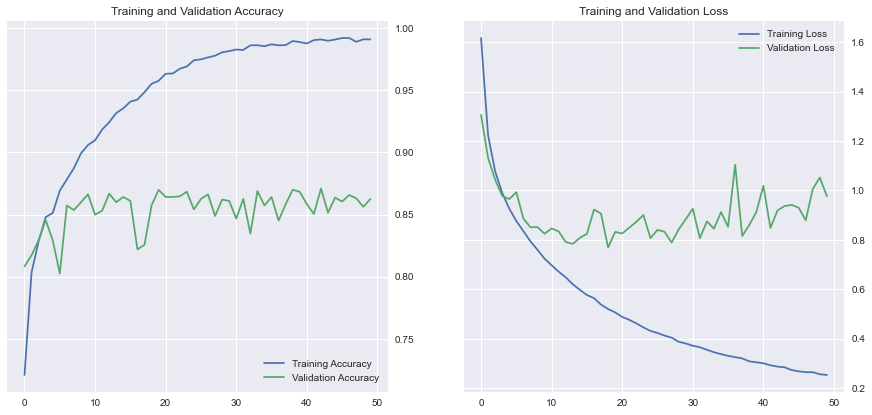

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()


## **10. Review classification metrics**
---


In [23]:
print(x_val.shape)
print(y_val.shape)

(1900, 64, 64, 3)
(1900, 2)


In [24]:
modelGo.load_weights(filepath)
modelGo.compile(loss = 'categorical_crossentropy', 
                optimizer = optmz, 
                metrics=['accuracy'])

predicts = modelGo.predict(x_val)
print("Prediction completes.")

Prediction completes.


In [25]:
print(predicts.shape)

(1900, 2)


In [26]:
predout     = np.argmax(predicts, axis = 1)
testout     = np.argmax(y_val, axis = 1)

testScores  = metrics.accuracy_score(testout, predout)                           # Step 3
                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names = labels,
                                    digits = 4))

report = metrics.classification_report(testout,
                                    predout,
                                    target_names = labels,
                                    digits=4,
                                      output_dict=True)

df = pd.DataFrame(report).transpose()
df.to_csv(folderpath + modelname + '_report.csv')

Best accuracy (on testing dataset): 87.11%
              precision    recall  f1-score   support

        Fish     0.8676    0.8589    0.8632       900
     NotFish     0.8741    0.8820    0.8780      1000

    accuracy                         0.8711      1900
   macro avg     0.8708    0.8704    0.8706      1900
weighted avg     0.8710    0.8711    0.8710      1900



## **13. Save the model plot**
---

In [27]:
plotpath  = folderpath + modelname + "_" + filename + '_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)

Path to plot: C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210142350_plot.png


In [2417]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [28]:
# Good Models
# Hybrid_Cifar100_202210042314 (Cifar_Mixed_3)
# Hybrid_Cifar100_202210050043 (Cifar_Mixed_3_3)
# Hybrid_Cifar100_202210052133 (Cifar_Mixed_3_3) BEST
# Hybrid_Cifar100_202210062242 (Cifar_Mixed_3_3)
# model_file = filepath
model_file = "C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\models\\Hybrid_Cifar100_202210142350.hdf5"

image_height = image_size
image_width = image_size

def predict_new_image(image):
    image_name = image
    
    image = tf.keras.utils.load_img(image, target_size = None)#, keep_aspect_ratio = True)
    
    image_array = tf.keras.utils.img_to_array(image)
    image_array = tf.keras.preprocessing.image.smart_resize(image_array, size = (image_height, image_width))
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0
    
    saved_model = load_model(model_file)
    
    predictions = saved_model.predict(image_array)
    score = tf.nn.softmax(predictions[0])
    
    print(image_name, 
        " most likely belongs to {} with a {:.2f} percent confidence."
        .format(labels[np.argmax(score)], 100 * np.max(score))
    )

In [29]:
os.chdir("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode")

print("---------------------Alan's Data--------------------------")
predict_new_image("validate/images/woman_1.jpg")
predict_new_image("validate/images/woman_2.jpg")

predict_new_image("validate/images/27.jpg")
predict_new_image("validate/images/betta0609.jpg")
predict_new_image("validate/images/betta0013.jpg")
predict_new_image("validate/images/betta0139.jpg")
predict_new_image("validate/images/betta0154.jpg")
predict_new_image("validate/images/Arrowana10662.jpg")

predict_new_image("validate/images/20120701-0rwniuozab_v_1543018810.jpg")
predict_new_image("validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg")
predict_new_image("validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg")
predict_new_image("validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg")

predict_new_image("validate/images/frame19230.jpg")
predict_new_image("validate/images/frame17950.jpg")
predict_new_image("validate/images/frame60.jpg")

predict_new_image("validate/images/starfish_3.jpg")

print("\n\n\n\n---------------------Fishes--------------------------")
predict_new_image("validate/fish.jpg")
predict_new_image("validate/whale.jpg")
predict_new_image("validate/betta.jpg")
predict_new_image("validate/betta1.jpg")
predict_new_image("validate/betta0154.jpg")
predict_new_image("validate/betta0154.jpg")
predict_new_image("validate/nemo.jpg")
predict_new_image("validate/flowerhorn-9.jpg")
predict_new_image("validate/fishbone.jpg")


print("\n\n\n\n---------------------Non Fishes--------------------------")
predict_new_image("validate/acq.jpg")
predict_new_image("validate/jeremy.jpg")
predict_new_image("validate/tree.jpg")
predict_new_image("validate/cockroach.jpg")
predict_new_image("validate/starfish.jpg")
predict_new_image("validate/car.jpg")
predict_new_image("validate/seal.jpg")
predict_new_image("validate/beaver.jpg")
predict_new_image("validate/woman.jpg")
predict_new_image("validate/starfish2.jpg")
predict_new_image("validate/beaver2.jpg")
predict_new_image("validate/seal2.jpg")
predict_new_image("validate/seal3.jpg")
predict_new_image("validate/ball.jpg")
predict_new_image("validate/brush.jpg")


---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 72.83 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.86 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.88 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 72.59 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 51.48 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 68.44 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belon

In [ ]:
Hybrid_Cifar100_202210142350
87.11%
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 72.83 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.86 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.88 percent confidence.
WARNING:tensorflow:5 out of the last 64 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001AF3D3D0A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
validate/images/betta0609.jpg  most likely belongs to Fish with a 72.59 percent confidence.
WARNING:tensorflow:6 out of the last 65 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001AF3D4C4AF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
validate/images/betta0013.jpg  most likely belongs to Fish with a 51.48 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 68.44 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.99 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.43 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 57.22 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.09 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.48 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.48 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 71.20 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 72.90 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 68.28 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.73 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.87 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 63.05 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.06 percent confidence.

In [ ]:
Hybrid_Cifar100_202210142350 FishOrNotFishReduced_3_3_06_CifarMixed (2 Dense, with 0.0013 egularizator)
RMSProp(learning_rate=0.0001)  
With Horizontal
87.11%

validate/images/woman_1.jpg  most likely belongs to NotFish with a 72.83 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.86 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.88 percent confidence.
WARNING:tensorflow:5 out of the last 64 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001AF3D3D0A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
validate/images/betta0609.jpg  most likely belongs to Fish with a 72.59 percent confidence.
WARNING:tensorflow:6 out of the last 65 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001AF3D4C4AF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
validate/images/betta0013.jpg  most likely belongs to Fish with a 51.48 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 68.44 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.99 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.43 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 57.22 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.09 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.48 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.48 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 71.20 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 72.90 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 68.28 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.73 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.87 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 63.05 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.06 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_06_CifarMixed (2 Dense, with 0.0015 egularizator)
RMSProp(learning_rate=0.0001)  
With Horizontal
87.21%

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 71.99 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 70.98 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.04 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 54.89 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.04 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.48 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.99 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.57 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 67.83 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 67.14 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 72.97 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.36 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 72.88 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_06_CifarMixed (2 Dense, with 0.0013 egularizator)
RMSProp(learning_rate=0.0001)  
With Horizontal
87.15%

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 67.59 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.98 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.95 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 66.27 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.68 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 69.65 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 58.50 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 68.57 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.90 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 72.95 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.57 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.64 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.10 percent confidence.

In [ ]:
Hybrid_Cifar100_202210142105 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0013 egularizator)
RMSProp(learning_rate=0.0001)  
With Horizontal
86.89%

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 72.29 percent confidence.
validate/images/woman_2.jpg  most likely belongs to Fish with a 57.77 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.50 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 72.47 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.04 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.84 percent confidence.
validate/images/frame17950.jpg  most likely belongs to Fish with a 50.80 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.57 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.99 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.97 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.55 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 59.19 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 53.60 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 59.02 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.21 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 51.21 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.10 percent confidence.

In [ ]:
Hybrid_Cifar100_202210141953 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0012 egularizator)
RMSProp(learning_rate=0.0001)  
With Horizontal
87.58%

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 72.90 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.75 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 66.33 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 71.28 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 71.63 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.48 percent confidence.
validate/images/frame17950.jpg  most likely belongs to Fish with a 62.53 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 71.65 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 72.43 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 72.94 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 69.30 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 69.30 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 71.46 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 66.48 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 56.24 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.13 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.25 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.84 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 60.23 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.59 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 71.65 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132327 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0012 egularizator)
RMSProp(learning_rate=0.0001)  

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 63.71 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.75 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 58.61 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 70.02 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 66.40 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 56.81 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.79 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.82 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 58.37 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 72.94 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 72.74 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 61.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 61.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.56 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 63.17 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.00 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 71.59 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 53.66 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 71.85 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.77 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.93 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 63.25 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132241 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0013 egularizator)


---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 63.50 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 63.20 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 59.83 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 66.92 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.91 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 72.09 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.67 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 69.52 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.17 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.89 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 57.05 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 70.70 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 66.48 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 72.49 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 71.82 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.65 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.09 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132214 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0015 Regularizator)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 68.03 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 71.10 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.48 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 72.45 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 69.23 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 65.21 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 67.75 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.93 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.90 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 72.90 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 68.29 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 72.85 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 50.54 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 50.54 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 67.17 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 69.43 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 62.17 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 71.89 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.00 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 72.76 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 67.08 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132210 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0016 Regularizator)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 61.28 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.14 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 70.30 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 54.33 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 56.85 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 69.14 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to NotFish with a 51.25 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 52.34 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.00 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.11 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 68.59 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 72.87 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 72.99 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 71.69 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 71.69 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.56 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 71.99 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 66.82 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 65.83 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 70.17 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 72.74 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.66 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.03 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132129 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.002 Regularizator)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 71.00 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 69.81 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 71.05 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 71.05 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 70.04 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.90 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.06 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 58.06 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 71.84 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 63.84 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 69.52 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.59 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 59.87 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 66.87 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 70.04 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 63.06 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 70.37 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.65 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 63.91 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.59 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 58.23 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 72.95 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 69.85 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132122 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0012 Regularizator)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 71.15 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.87 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 57.35 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 57.45 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.19 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.06 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 72.87 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.33 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 66.47 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 66.47 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.10 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.89 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 72.71 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 70.87 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210132021 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.0012 Regularizator)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 51.34 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 71.94 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 72.38 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 70.35 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.02 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 70.89 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 69.13 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 61.76 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 69.68 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 69.68 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 71.97 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 72.18 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.31 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.98 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.92 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 70.09 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.97 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210131950 FishOrNotFishReduced_3_3_CifarMixed (2 Dense, with 0.001 Regularizator)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 71.35 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 70.03 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 64.36 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 57.40 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.09 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.38 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.99 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 72.98 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.95 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.28 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 71.64 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.10 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.87 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.87 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.03 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 71.84 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.36 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 71.74 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 69.57 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 72.55 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.10 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_CifarMixed FishOrNotFishReduced_3_3_CifarMixed (2 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 68.76 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 67.72 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 57.32 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.47 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.02 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.78 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.96 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 61.88 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 72.34 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.70 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 71.94 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.21 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_CifarMixed Hybrid_Cifar100_202210131919 (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 71.70 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.01 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 55.42 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 71.35 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.21 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 64.23 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.89 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 59.04 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 51.40 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 69.97 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 72.53 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 71.92 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 71.92 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 70.41 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 64.05 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 50.60 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_1_1_CifarMixed (Cleaned Goldfish) Hybrid_Cifar100_202210131908 (3 Dense with Dropout)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 69.65 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.97 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.33 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 64.27 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 72.96 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 53.25 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 72.34 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.82 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 63.00 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 69.31 percent confidence.
validate/ball.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.11 percent confidence.
​

In [ ]:
FishOrNotFishReduced_3_3_1_1_CifarMixed (Cleaned Goldfish) Hybrid_Cifar100_202210131902 (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 72.51 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 64.14 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 72.17 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.92 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.87 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.00 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 69.23 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 71.71 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 53.37 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.00 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 70.23 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 67.35 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 64.05 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 71.54 percent confidence.
validate/seal2.jpg  most likely belongs to Fish with a 60.79 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 70.53 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 59.11 percent confidence.

In [ ]:
FishOrNotFishReduced_3_3_1_1_CifarMixed Hybrid_Cifar100_202210131846 (3 Dense)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 72.69 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.71 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.20 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 69.68 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 67.12 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.73 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.48 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 68.05 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 72.69 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 62.85 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.00 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 65.11 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 52.28 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 72.87 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 60.91 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.24 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 70.99 percent confidence.

In [949]:
Hybrid_Cifar100_202210130003 FishOrNotFishReduced_3_3_CifarMixed (4 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.01 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 69.86 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 69.80 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 64.75 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 64.89 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.99 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 68.08 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 67.83 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 55.47 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 55.39 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 53.85 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 59.68 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.03 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.59 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

SyntaxError: invalid syntax (1482931840.py, line 1)

In [ ]:
Hybrid_Cifar100_202210122358 FishOrNotFishReduced_3_3_CifarMixed (4 Dense + 1 Conv)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 68.29 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.74 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 60.14 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 51.80 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 68.96 percent confidence.
validate/images/betta0154.jpg  most likely belongs to NotFish with a 59.24 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 72.97 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.00 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 69.00 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 55.87 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to NotFish with a 52.13 percent confidence.
validate/betta0154.jpg  most likely belongs to NotFish with a 52.13 percent confidence.
validate/nemo.jpg  most likely belongs to NotFish with a 52.96 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.04 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.70 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 70.52 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.66 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.44 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.03 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.03 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 72.44 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.10 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122352 FishOrNotFishReduced_3_3_CifarMixed (3 Dense + 1 Conv - Worse than previous)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 57.01 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 71.86 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 66.84 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to NotFish with a 61.39 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.97 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.99 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 70.06 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.03 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 72.92 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 70.32 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 50.24 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 58.89 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.76 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 72.89 percent confidence.


In [ ]:
###### To be refined

Hybrid_Cifar100_202210122347 FishOrNotFishReduced_3_3_CifarMixed (3 Dense)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 52.74 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 71.78 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 68.94 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.82 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to NotFish with a 64.17 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 53.70 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.65 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 52.16 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 72.42 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.98 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 66.76 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122336 FishOrNotFishReduced_3_3_1_CifarMixed (4 Dense and Con till 2048 - Not Working)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 54.04 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to NotFish with a 55.23 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 69.00 percent confidence.
validate/car.jpg  most likely belongs to Fish with a 68.78 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to Fish with a 63.01 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 57.62 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal3.jpg  most likely belongs to Fish with a 50.31 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122325 FishOrNotFishReduced_3_3_1_CifarMixed (4 Dense and Con till 1024)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 71.65 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 71.91 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 72.13 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 72.71 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 72.98 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 61.93 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 63.27 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 51.46 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 57.39 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122316 FishOrNotFishReduced_3_3_1_CifarMixed (4 Dense worse than 3 Dense)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 69.48 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 56.38 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to NotFish with a 70.51 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.12 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.04 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.73 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.94 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.94 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 68.49 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 55.20 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 65.37 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 71.59 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 73.01 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 69.34 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122303 FishOrNotFishReduced_3_3_1_CifarMixed (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 71.44 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 67.79 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 66.50 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 65.44 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 58.58 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.02 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.01 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 69.07 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 56.16 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 66.05 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 66.05 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 72.48 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 73.03 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 62.30 percent confidence.
validate/car.jpg  most likely belongs to Fish with a 50.46 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 72.60 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.57 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.67 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 65.38 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 69.90 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 63.59 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 72.91 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122254 FishOrNotFishReduced_3_3_2_CifarMixed (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.37 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.22 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 67.71 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
###### To be refined

Hybrid_Cifar100_202210122246 FishOrNotFishReduced_3_3_1_CifarMixed (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.02 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 72.58 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 69.90 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 65.98 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 69.84 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.99 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.06 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 67.26 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.23 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 70.71 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.82 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.82 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 72.97 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 60.10 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 56.89 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 71.18 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 72.62 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 65.68 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 58.36 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122236 FishOrNotFishReduced_3_3_1_CifarMixed (2 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 61.54 percent confidence.
validate/images/woman_2.jpg  most likely belongs to Fish with a 66.27 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 69.35 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 72.91 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 70.32 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.96 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 71.41 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.44 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 67.56 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 71.56 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.72 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.10 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 56.79 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 71.95 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 66.58 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 68.93 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 70.54 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 71.91 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 72.86 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 61.64 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 72.75 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 59.18 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 69.62 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 53.07 percent confidence.

In [ ]:
###### To be refined #####

Hybrid_Cifar100_202210122228 FishOrNotFishReduced_3_3_1_CifarMixed (3 Dense)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 54.89 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.98 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 69.92 percent confidence.
validate/images/betta0013.jpg  most likely belongs to NotFish with a 61.74 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.05 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.81 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 73.08 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.



---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 60.90 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.74 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 71.93 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 72.89 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122220 FishOrNotFishReduced_3_3_2_CifarMixed (Starfish - 650 130)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 69.25 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.03 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 70.77 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 72.92 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 72.87 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 51.13 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 66.22 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 64.79 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 72.38 percent confidence.
validate/car.jpg  most likely belongs to Fish with a 72.76 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 65.06 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 60.95 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 68.25 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 63.99 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.01 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.10 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122153 FishOrNotFishReduced_3_3_CifarMixed (Increased dropouts at every layer fails badly)

---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 70.58 percent confidence.
validate/images/woman_2.jpg  most likely belongs to Fish with a 57.74 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 68.55 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 51.03 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 71.88 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 67.74 percent confidence.
validate/images/frame17950.jpg  most likely belongs to Fish with a 60.13 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 58.51 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.02 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 72.86 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.07 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.05 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 65.49 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.70 percent confidence.
validate/jeremy.jpg  most likely belongs to Fish with a 58.79 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 66.15 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/car.jpg  most likely belongs to Fish with a 72.74 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 69.83 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to Fish with a 51.11 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/seal2.jpg  most likely belongs to Fish with a 53.51 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 64.94 percent confidence.
validate/ball.jpg  most likely belongs to Fish with a 71.64 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.10 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122144 FishOrNotFishReduced_3_3_CifarMixed (With one more dense layer and increased dropouts)
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 71.76 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 72.94 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 65.58 percent confidence.
validate/images/frame17950.jpg  most likely belongs to Fish with a 66.25 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 50.72 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to Fish with a 73.04 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 70.03 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/car.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 66.52 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 62.86 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 67.58 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 71.82 percent confidence.
validate/ball.jpg  most likely belongs to Fish with a 73.03 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.11 percent confidence.

In [ ]:
Hybrid_Cifar100_202210122135 FishOrNotFishReduced_3_3_CifarMixed
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 72.53 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 71.75 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 69.75 percent confidence.
validate/images/frame17950.jpg  most likely belongs to Fish with a 52.38 percent confidence.
validate/images/frame60.jpg  most likely belongs to Fish with a 68.87 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/starfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 68.23 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 67.20 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 55.69 percent confidence.
validate/starfish2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/beaver2.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 50.59 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.09 percent confidence.
validate/brush.jpg  most likely belongs to Fish with a 73.11 percent confidence.

In [ ]:
# Hybrid_Cifar100_202210122100 FishOrNotFishReduced_3_3_1_CifarMixed
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to NotFish with a 73.01 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 73.00 percent confidence.
validate/images/betta0609.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 72.78 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.03 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 73.03 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.02 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 72.60 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to Fish with a 73.02 percent confidence.
validate/beaver.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 67.05 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.16 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 66.49 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.

In [ ]:
# Hybrid_Cifar100_202210052133 (Cifar_Mixed_3_3) BEST
---------------------Alan's Data--------------------------
validate/images/woman_1.jpg  most likely belongs to Fish with a 73.10 percent confidence.
validate/images/woman_2.jpg  most likely belongs to NotFish with a 70.35 percent confidence.
validate/images/27.jpg  most likely belongs to Fish with a 72.92 percent confidence.
validate/images/betta0609.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/images/betta0013.jpg  most likely belongs to Fish with a 64.65 percent confidence.
validate/images/betta0139.jpg  most likely belongs to Fish with a 73.09 percent confidence.
validate/images/betta0154.jpg  most likely belongs to Fish with a 72.05 percent confidence.
validate/images/Arrowana10662.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/20120701-0rwniuozab_v_1543018810.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/7-74036_goldfish-png-transparent-image-real-fish-png.jpg  most likely belongs to Fish with a 72.70 percent confidence.
validate/images/412-4125726_the-pet-shop-worthing-types-of-goldfish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/969cc5c8f8ac167e7c836ac98c81375e.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/images/frame19230.jpg  most likely belongs to NotFish with a 66.52 percent confidence.
validate/images/frame17950.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/images/frame60.jpg  most likely belongs to NotFish with a 59.64 percent confidence.
validate/images/starfish_3.jpg  most likely belongs to Fish with a 73.10 percent confidence.




---------------------Fishes--------------------------
validate/fish.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta.jpg  most likely belongs to Fish with a 73.08 percent confidence.
validate/betta1.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.24 percent confidence.
validate/betta0154.jpg  most likely belongs to Fish with a 72.24 percent confidence.
validate/nemo.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/flowerhorn-9.jpg  most likely belongs to Fish with a 73.11 percent confidence.
validate/fishbone.jpg  most likely belongs to Fish with a 73.11 percent confidence.




---------------------Non Fishes--------------------------
validate/acq.jpg  most likely belongs to Fish with a 72.95 percent confidence.
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/cockroach.jpg  most likely belongs to NotFish with a 66.08 percent confidence.
validate/starfish.jpg  most likely belongs to NotFish with a 72.13 percent confidence.
validate/car.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/seal.jpg  most likely belongs to NotFish with a 73.06 percent confidence.
validate/beaver.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/woman.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/starfish2.jpg  most likely belongs to NotFish with a 73.07 percent confidence.
validate/beaver2.jpg  most likely belongs to NotFish with a 73.10 percent confidence.
validate/seal2.jpg  most likely belongs to NotFish with a 71.61 percent confidence.
validate/seal3.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/ball.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
validate/brush.jpg  most likely belongs to NotFish with a 73.11 percent confidence.